# LINEARNA REGRESIJA


  
U statistici, ** *linearna regresija* ** se odnosi na svaki pristup modeliranju relacija između jedne ili više varijabli označene sa Y te jedne ili više varijabli označene sa X, na način da takav model linearno ovisi o nepoznatim parametrima koji su procijenjeni iz podataka. 

Neka su $x^{(1)},x^{(2)},...,x^{(k)}$ kontrolirane (neslučajne) varijable i Y slučajna varijabla mjerena u ovisnosti o $x=(x^{(1)},x^{(2)},...,x^{(k)})$, odnosno $Y=Y(x)$.

Linearni model ovisnosti veličine Y o x zadan je sa

$$Y=\theta _{0}+\theta _{1}x^{(1)}+...+\theta _{k}x^{(k)}+\varepsilon, $$

pri čemu je $\varepsilon$ slučajna pogreška, a $\theta_{0},\theta_{1},...,\theta_{k}$ parametri modela.


U sljedećem radu ispituje se linearna zavisnost podataka i konstruira odgovarajući aproksimativni model koristeći linearnu regresiju.

In [1]:
import pandas as pd
import sympy as sp
import scipy as sc
import numpy as np

from IPython.display import display
from ipywidgets import interact, fixed, interact_manual
import ipywidgets as widgets

Rad * „Thermal Conductivity of Polyethylene: The Effects of Crystal Size, Density and Orientation on the Thermal Conductivity“ (Polymer Eng. and Science, 1972., str 204-208)* proučava vezu između termičke vodljivosti i lamelarne gustoće. 

**Termička vodljivost** je fizikalna veličina koja opisuje kako toplina prolazi kroz tvari. 
Ovisi o vrsti, strukturi, gustoći, vlažnosti i temperaturi tvari. Računa se prema formuli:

$$\lambda =\frac{Ql}{St\Delta T}$$.

Podaci o mjerenjima dobiveni su iz *DEVORE, JAY L., Probability and Statistics for Engineering and the Sciences, 1982., Brooks/Cole Publishing Company, Monterey, California, str. 476*.

## Deskriptivna analiza

Prije same linearne regresije, provodi se deskriptivna analiza dobivenih podataka kako bi se uočila moguća odstupanja.

**Histogram** je grafički prikaz podataka takav da površina stupca predstavlja relativnu frekvenciju za određeni interval tj.razred ili joj je proporcionalna.

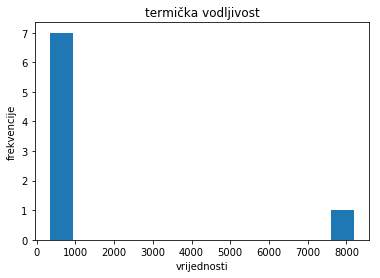

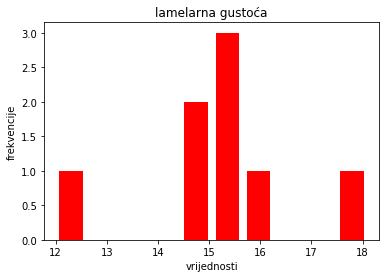

In [2]:
x=np.array([240,410,460,490,520,590,745,8300])
y=np.array([12.0,14.7,14.7,15.2,15.2,15.6,16.0,18.1])

import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(x,rwidth=0.75)
plt.title('termička vodljivost')
plt.xlabel('vrijednosti')
plt.ylabel('frekvencije')
plt.show()

plt.hist(y, color='r',rwidth=0.75)
plt.xlabel('vrijednosti')
plt.ylabel('frekvencije')
plt.title('lamelarna gustoća')
plt.show()


Histogrami dobivenih podataka upućuju na znatno odstupanje posljednjeg podatka za termičku vodljivost, što se može kasnije pokazati kao pogreška pri prikupljanju podataka.

Promatramo karakterističnu petorku uzoraka. **Karakteristična petorka** je naziv za 5 deskriptivnih vrijednosti pojedinih distribucija. To su *min, 25 percentil, medijan, 75 percentil, max.*

**Aritmetička sredina** od X je broj  $\bar{x}=\frac{1}{n}\sum_{i=1}^{n}x_{i}$ , pri čemu je n duljina uzorka.

**Medijan** je vrijednost od X za koju vrijedi da je 50% podataka manje od ili jednako toj vrijednosti i 50% podataka je veće od ili jednako toj vrijednosti.

**Mod** je vrijednost od X s najvećom frekvencijom.

In [3]:
from scipy import stats
def amm(x):
    a=np.mean(x)
    b=np.median(x)
    c=stats.mode(x, axis=None)
    print(a,b,c)
    
amm(x)
amm(y)

1469.375 505.0 ModeResult(mode=array([240]), count=array([1]))
15.1875 15.2 ModeResult(mode=array([14.7]), count=array([2]))


Uočavamo da se aritmetička sredina i medijan značajno razlikuju za termičku vodljivost, dok su za lamelarnu gustoću približno jednake. Mod za termičku vodljivost je upravo prvi element jer su svi elementi jedinstveni, dok je mod za lamelarnu vodljivost jedini element koji se pojavljuje dva puta.

Vizualizirajmo karakterističnu petorku pomoću box plota. **Box-plot**, odnosno dijagram pravokutnika, je grafički prikaz podataka koji prikazuje karakterističnu petorku $(x_{(1)}, q_{L}, m, q_{U}, x_{(n)})$.

Sastoji se od pravokutnika koji prikazuje podatke od donjeg do gornjeg kvartila. Crta po pravokutniku označava *medijan*, donje i gornje horizontalne linije nazivaju se *whisker*. Predstavljaju najmanji i najveći podatak koji se nalazi unutar 1.5 puta interkvartilnog raspona gledajući od donjeg, odnosno gornjeg kvartila. Sve točke izvan te granice crtaju se posebno i smatraju *outlierima*.

Izgled box-plota ukazuje na stupanj raspršenosti i asimetričnosti te može pokazati outliere među podacima.


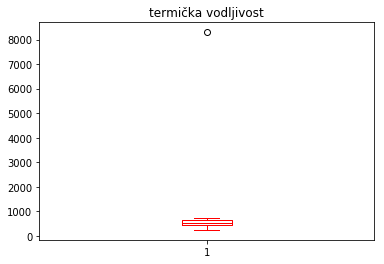

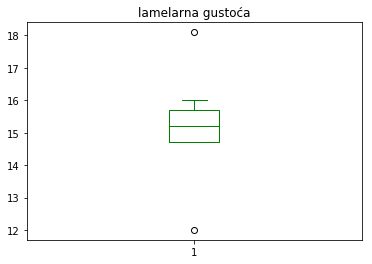

In [4]:
def bp_boja(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

t=plt.boxplot(x)
bp_boja(t, 'red')
plt.title('termička vodljivost')
plt.show()

v=plt.boxplot(y)
bp_boja(v,'green')
plt.title('lamelarna gustoća')
plt.show()

## Prikaz podataka


U daljnjem razmatranju termičku vodljivost označavat ćemo s x, a lamelarnu gustoću s y.
Prikažimo dobivene podatke grafički.

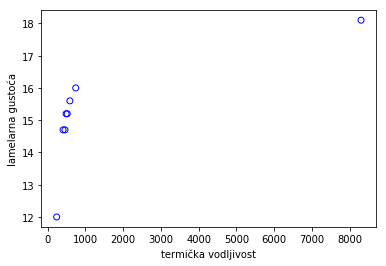

In [5]:
plt.scatter(x,y,facecolors='none',edgecolors='b')
plt.xlabel('termička vodljivost')
plt.ylabel('lamelarna gustoća')
plt.show()

Iz grafa ne uočavamo postojanje linearne zavisnosti, stoga je potrebna daljnja transformacija podataka. Definiraju se novi podaci: $$x_{1}=\frac{1}{x}$$.

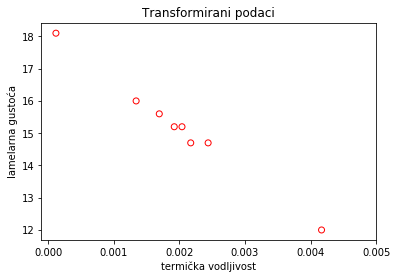

In [6]:
x1=1/x
plt.scatter(x1,y,facecolors='none',edgecolors='r')
plt.xlim(-0.0001,0.005)
plt.xlabel('termička vodljivost')
plt.ylabel('lamelarna gustoća')
plt.title('Transformirani podaci')
plt.show()

Iz grafa transformiranih podataka jasno je da točke upućuju na aproksimaciju pravcem.
Prilagodba linearnog modela $y=\theta_{0}+\theta _{1}x_{1}$  provodi se uz pretpostavku da vrijede Gauss-Markovljevi uvjeti:

-  $E[\varepsilon _{i}]=0 ,\forall i=1,2,...n$
-  $E[\varepsilon _{i}\varepsilon _{j}]=0 ,\forall i,j=1,...,n, i\neq j$
-  $Var[\varepsilon_{i}]=\sigma ^{2}>0,\forall i=1,2,...n$

Tada je nepristrani procjenjitelj za  θ metodom najmanjih kvadrata dan kao rješenje:
$\widehat{\Theta }= \left ( X^{T}X \right )^{-1}X^{T}Y$.

Definiramo matrice podataka:

In [7]:
import numpy.linalg as la
n=len(x1)
X=np.zeros((n,2))
#prvi stupac sve 1, drugi stupac sve x1

X[:,0]=1
X[:,1]=x1

Y=np.zeros((n,1))
Y[:,0]=y
    
Theta=np.zeros((2,1))
Theta=la.inv((X.T @ X)) @ X.T @ Y
Theta

array([[   18.13948769],
       [-1485.16693975]])

Traženi linearni model je:
$$y=18.1395-1485.1669*x_{1}.$$

Dobiveni pravac zajedno s transformiranim podacima prikazan je na sljedećem grafu iz kojeg uočavamo jaku negativnu linearnu povezanost.


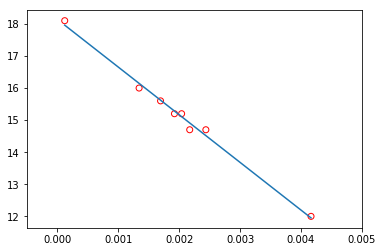

In [8]:
yp=np.polyval([Theta[1],Theta[0]],x1)
plt.scatter(x1,y,facecolors='none',edgecolors='r')
plt.xlim(-0.0005,0.005)
plt.plot(x1,yp)
plt.show()

Provodimo analizu rasipanja podataka računanjem statistike $R^{2}$, tj koeficijenta determinacije.
Dobiva se iz sljedećeg izraza:

$$R^{2}=1-\frac{SSE}{Syy},$$
pri čemu su
 
$$SSE=\sum_{i=1}^{n}\left ( Y_{i}-\hat{Y_{i}} \right )^{2},$$
$$Syy=\sum_{i=1}^{n}\left ( Y_{i}-\bar{Y} \right )^{2}.$$

Koeficijentom determinacije se ispituje reprezentativnost dobivenog modela.
SSE opisuje rasipanje izlaznih podataka oko procijenjene regresijske funkcije.
Syy opisuje rasipanje izlaznih podataka oko njihove sredine.

In [9]:
rez=np.array([])

transf= lambda arg1: Theta[0]+Theta[1]*arg1;

rez=((y-transf(x1))**2)

SSE=sum(rez)
ym=np.mean(y)
Syy=sum((y-ym)**2)
R2=1-SSE/Syy
R2

0.9931399938918773

Koeficijent determinacije je približno $R^{2}$=0.9931, što tumačimo tako da 99.31% rasipanja izlaznih podataka potječe od funkcijske ovisnosti transformiranih podataka o regresijskoj funkciji, a samo 0.69% otpada na rezidualno raspipanje, tkz „neobjašnjeno rasipanje“ (preveliko neobjašnjeno rasipanje upućuje na promjenu modela).
Može se zaključiti da je model jako dobro prilagođen podacima.


## Testiranje hipoteza o koeficijentu regresije

Za daljnju analizu adekvatnosti modela provodimo testiranje parametara modela. Pretpostavlja se da vrijede Gauss-Markovljevi uvjeti.

Testiraju se sljedeće hipoteze o koeficijentu regresije:
$$H_{0}: \theta_{1}=-1500$$
$$H_{1}: \theta_{1} \neq -1500$$

Zapravo se radi o testiranju hipoteza:
$$H_{0}: C\theta-y=0$$
$$H_{1}: C\theta-y \neq 0$$

pri čemu su: C matrica tipa $m*(k+1)$ td $r(C)=m$ i y vektor tipa $m*1$, gdje je $m\leq k$

In [10]:
C=np.zeros((1,2))
C[0,1]=1
gamma=-1500

Koristi se testna statistika F koja ima Fischerovu razdiobu:
$$F=\frac{(C\hat{\theta}-y)^{T}\left [ C(X^{T}X)^{-1}C^{T}\right ]^{-1}(C\hat{\theta}-y)}{m\hat{\sigma}^{2}}\sim F(k,n-k-1),$$

pri čemu je $\hat{\sigma}^{2}=\frac{SSE}{n-k-1}$

In [11]:
m=k=1
sigmakap=SSE/(n-k-1)
F=(C @ Theta - gamma) @ la.inv( C @ la.inv( X.T @ X ) @ C.T) @ ( C @ Theta - gamma)/sigmakap
F

array([[0.08664594]])

Odredimo i *p-vrijednost* testa:

In [12]:
from scipy.stats import f
p=1-f.cdf(F, k, n-k-1, loc=0, scale=1)
p

array([[0.77840352]])

Dobivena p-vrijednost testa je velika pa ne možemo odbaciti nultu hipotezu.

## Test prihvatljivosti reduciranog u odnosu na potpuni (prošireni) model

Kada je linearnost prihvaćena, ovaj test se koristi u procesu odabira linearnog modela, odnosno kod određivanja varijabli $x^{(1)},x^{(2)},...,x^{(k)}$ ili funkcija $p_{1},p_{2},...,p_{k}$ koje će biti zastupljene modelom.

Neka su u prvom slučaju odabrane varijable $z^{(1)},z^{(2)},...,z^{(m)}$, gdje je $0\leq m< k$.

-reducirani model (r=reduced):
$$Y=\theta _{0}+\theta _{1}z^{(1)}+...+\theta _{m}z^{(m)}+\varepsilon _{z}$$
-potpuni model (f=full):
$$Y=\theta _{0}+\theta _{1}x^{(1)}+...+\theta _{m}x^{(k)}+\varepsilon _{x}$$

Testiramo:

$H_{0}:$ reducirani model je dovoljan

$H_{1}:$ potpuni model je potreban

Koristi se testna statistika:

$$F=\frac{( SSEr - SSEf )/(k-m)}{SSEf/(n-k-1)}\sim F(k-m,n-k-1)$$

In [13]:
Z=np.zeros((n,3))
Z[:,0]=1
Z[:,1]=x1
Z[:,2]=x1**2

thetaz=la.inv((Z.T @ Z)) @ Z.T @ Y
transf2= lambda arg1: thetaz[0]+thetaz[1]*arg1+ thetaz[2]*arg1**2;
z=np.array([])
z=transf2(x1)
ee=y-z

SSEp=sum(ee**2)
k=2
m=1
fstat=((SSE-SSEp)/(k-m))/(SSE/(n-k-1))

pv=1-f.cdf(fstat,k-m,n-k-1)
pv

0.4310382336715697

P-vrijednost testa iznosi približno 0.431 pa za određene razine značajnosti $\alpha$ (za $p \leq \alpha$) odbacujemo nultu hipotezu u korist alternativne. Dakle, koji model je prihvatljiviji ovisi o razini značajnosti koju zahtijevamo.
Ukoliko razina značajnosti nije određena, promatraju se grafovi reziduala i standardiziranih reziduala oba modela te grafovi pripadnih regresijskih funkcija.

## Testovi koreliranosti

**Korelacija** predstavlja suodnos ili međusobnu povezanost između različitih pojava predstavljenih vrijednostima dvaju varijabli. *Koeficijenti korelacije* izražavaju mjeru povezanosti između dvije varijable. 

U praksi se prilikom rada s linearnim modelima najčešće koristi **Pearsonov koeficijent korelacije**:
$$r=\frac{S_{X Y}}{\sqrt{S_{X X}*S_{Y Y}}}$$

In [14]:
xm=np.mean(x)
Sxx=sum((x-xm)**2)
Sxy=sum((x-xm)*(y-ym))
r=Sxy/np.sqrt(Sxx*Syy)
koef, pv=sc.stats.pearsonr(x,y)
print('Pearsonov koeficijent korelacije iznosi %f, a p-vrijednost je:%f .'%(r, pv))

Pearsonov koeficijent korelacije iznosi 0.730143, a p-vrijednost je:0.039723 .


Pearsonov koeficijent korelacije je vrijednost iz intervala $[-1,1]$, u ovom slučaju blizu 1 što upućuje na pozitivnu korelaciju, ali p-vrijednost je veoma mala.

Pearsonov test zahtijeva normalnu distribuiranost podataka. Drugi test koreliranosti je pomoću **Spearmanovog koeficijenta korelacije**, bazira se na tome da se izmjeri dosljednost povezanosti između poredanih varijabli. Kao rezultat daje približnu vrijednost koeficijenta korelacije koji se tretira kao njegova dovoljno dobra aproksimacija .


In [15]:
ks,pv=sc.stats.spearmanr(x,y)
print('Spearmanov koeficijent korelacije iznosi %f, a p-vrijednost je:%f .'%(ks, pv))

Spearmanov koeficijent korelacije iznosi 0.988024, a p-vrijednost je:0.000004 .


Zaključujemo da postoji pozitivna koreliranost između podataka.


## Reziduali

Koristeći formulu regresijskog pravca, za svaku vrijednost $x_{1 i}$ moguće je izračunati pripadnu teorijsku vrijednost $y_{i}$.Računamo niz odstupanja teorijske od eksperimentalne vrijednosti. 

**Reziduali** su slučajne varijable $E_{i}=Y_{i}-\bar{Y_{i}},$ odnosno njihove realizacije $e_{i}$ za i=1,...,n.

**Standardizirani reziduali** su slučajne varijable
$$E_{i}^{s}=\frac{E_{i}}{\hat{\sigma }\sqrt{1-h_{i i}}},$$

gdje je $H=X(X^{T}X)^{-1}X^{T}=[h_{i j}],$ odnosno njihove realizacije $e_{i}^{s}$ za i=1,...,n.

Za dovoljno veliki n i dovoljno male $h_{i i}$, standardizirani reziduali aproksimativno čine uzorak iz *N(0,1)* razdiobe.

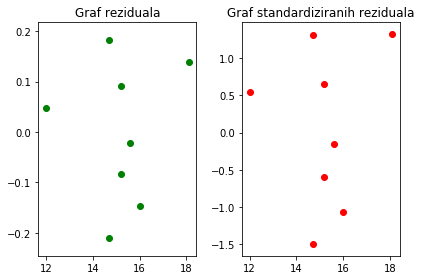

In [16]:
e=np.array([])
e=y-transf(x1)

es=np.array([])

H=np.zeros((n,n))
H=X @ la.inv(X.T @ X) @ X.T

h=np.diag(H)
j=np.ones(n)

es=e/np.sqrt(sigmakap*(j-h))

plt.subplot(1,2,1)
plt.scatter(y,e,color='green')
plt.title('Graf reziduala')

plt.subplot(1,2,2)
plt.scatter(y,es,color='red')
plt.title('Graf standardiziranih reziduala')
plt.tight_layout()
plt.show()

Budući da su točke slučajno grupirane oko x-osi na oba grafa, možemo zaključiti da je prilagodba modela zadovoljavajuća.

## Provjera normalnosti reziduala

Pomoću normalnog vjerojatnosnog grafa provjerava se dolaze li reziduali i standardizirani reziduali iz jedinične normalne distribucije. Kao primjer postupka, analizu provodimo za standardizirane reziduale.


Podaci se prvo sortiraju, a potom pomoću funkcije distribucije $\Phi $ jedinične normalne razdiobe definiramo:

$$xe_{i}=\Phi^{-1}\left ( \frac{i-\frac{3}{8}}{n+\frac{1}{4}} \right ),  i=1,...,n.$$

U Kartezijevom koordinatnom sustavu prikažu se točke $(xe_{i},es_{i} )$, i=1,...,n  te je dobiveni graf upravo normalni vjerojatnosni graf.


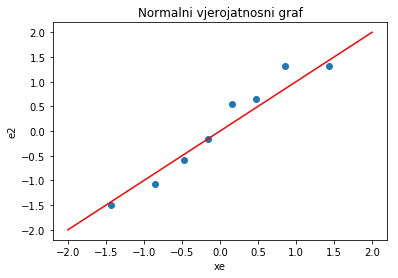

In [17]:
from scipy import stats
from scipy.stats import norm

e2=np.sort(es)
xe=np.zeros(n)
def nmg(x): return  norm.ppf((x-3/8)/(n+1/4), loc=0, scale=1)

for i in range(1,9): xe[i-1]=nmg(i)

plt.plot([-2,2],[-2,2],color='red')
plt.scatter(xe,e2)
plt.title('Normalni vjerojatnosni graf')
plt.xlabel('xe')
plt.ylabel('e2')
plt.show()

Točke $(xe,e2)$ u normalnom vjerojatnosnom grafu moraju biti aproksimativno na pravcu $y=\mu +\sigma*x$.

## Pouzdano područje za $\Theta$

Neka su $L_{n}=l_{n}(X_{1},X_{2},...,X_{n})$ i $D_{n}=d_{n}(X_{1},X_{2},...,X_{n})$ statistike slučajnog uzorka $X_{1},X_{2},...,X_{n}$. Za $[L_{n},D_{n}]$ kažemo da je $(1-\alpha)$100% **pouzdani interval** za parametar $\tau$ ako vrijedi:

$$\mathbb{P}\left ( L_{n}\leq \tau\leq D_{n} \right )\geq 1-\alpha, \alpha \in \left \langle 0,1 \right \rangle.$$

Pouzdano područje je višedimenzionalan prikaz pouzdanih intervala. Radi se o nizu točaka u n-dimenzionalnom prostoru, za n=1 to je unutrašnjost elipse, n=2 unutrašnjost elipsoida, itd.

Pouzdani intervali za $\theta_{j}$ konstruiraju se koristeći:

$$\frac{\hat{\theta_{j}}-\theta_{j}}{\hat{\sigma}{\sqrt{c_{jj}}} }\sim t(n-k-1),$$ 

gdje je $C=(X^{T}X)^{-1}=[c_{j j}]$, za j=1,...,k.

Iz izraza
$$\mathbb{P}_{\theta_{j}}\left ( -t_{1-\frac{\alpha}{2}}(n-k-1)\leq \frac{\hat{\theta_{j}}-\theta_{j}}{\hat{\sigma}{\sqrt{c_{jj}}} }\leq t_{1-\frac{\alpha}{2}}(n-k-1) \right )=1-\alpha$$
dobivamo pouzdana područja za parametre regresije.
Prikažimo 95% pouzdano područje za $\Theta.$


In [18]:
from scipy.stats import t
alfa=0.05
C=np.zeros((2,2))
C=la.inv(X.T @ X)
ci=np.diag(C)
t=t.ppf(1-alfa/2,n-k-1, loc=0, scale=1)

lrub=Theta.T-t*np.sqrt(sigmakap*ci)
drub=Theta.T+t*np.sqrt(sigmakap*ci)

Dakle, 95% pouzdani interval za $\theta_{0}$ je [17.86175,18.41722], a 95% pouzdani interval za $\theta_{1}$ je [-1608.47032,-1361.86356].

Grafički prikaz 95% pouzdanog područja za $\theta=(\theta_{0},\theta_{1})$ konstruiramo koristeći:

$$F=\frac{1}{\left ( k+1 \right )\hat{\sigma} ^{2}}((X^{T}X)(\theta-\hat{\theta}),\theta-\hat{\theta})\sim F(k+1,n-k-1).$$

Zbog  $\mathbb{P}(F\leq f_{\alpha})=1-\alpha$  iz  $F\leq f_{\alpha}\leq 0$ dobiva se traženo pouzdano područje. U ovom slučaju k=1 pa očekujemo unutrašnjost elipse.


In [19]:
from IPython.display import Image
from IPython.display import display
display(Image(url='https://upload.wikimedia.org/wikipedia/en/thumb/b/b4/Ellipse_Animation.gif/640px-Ellipse_Animation.gif'))

Definiramo funkciju:
$$\theta\mapsto \frac{(\theta-\hat{\theta})^{T}(X^{T}X)(\theta-\hat{\theta})}{(k+1)\hat{\sigma} }-f_{\alpha}(k+1,n-k-1)$$

U matričnom zapisu funkcija ima oblik $\theta^{T}M\theta+v^{T}\theta+c,$ gdje su $\theta$ vektor stupac, M simetrična matrica reda 2, v vektor stupac dimenzije 2 te c konstanta.

In [20]:
from scipy.stats import f
fk=f.ppf(1-alfa,k+1,n-k-1,loc=0,scale=1)

M=(X.T @ X)/((k+1)*sigmakap)
v=-2*(X.T @ X @ Theta)/((k+1)*sigmakap)
c=(Theta.T @ X.T @ X @ Theta)/((k+1)*sigmakap)-fk

Jednadžba se svodi na kanonski oblik:

$$\frac{(x-s_{x})^{2}}{r_{x}}+\frac{(y-s_{y})^{2})}{r_{y}}\leq 1$$

In [21]:
sv=la.eig(M)
Msv=sv[0] 
vektori=sv[1] 

vc=vektori.T @ v 

A=vektori.T @ M @ vektori
sx=-vc[0]/(2*A[0,0])
sy=-vc[1]/(2*A[1,1])

pom=c-A[0,0]*(sx**2)-A[1,1]*(sy**2)

rx=np.sqrt(-pom/A[0,0])
ry=np.sqrt(-pom/A[1,1])

Zbog jednostavnijeg grafičkog prikaza radi se transformacija u polarne koordinate.


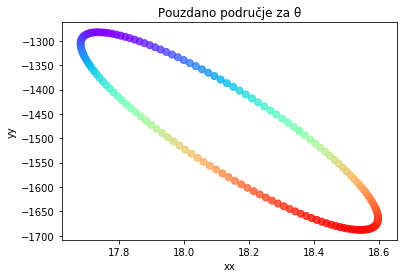

In [22]:
import math
theta=np.linspace(start=0,stop=2*math.pi,num=150)

xx=np.array([])
yy=np.array([])

xx=vektori[0,0]*(sx+rx*np.cos(theta))+vektori[0,1]*(sy+ry*np.sin(theta))

yy=vektori[1,0]*(sx+rx*np.cos(theta))+vektori[1,1]*(sy+ry*np.sin(theta))

plt.scatter(xx,yy, c=np.arctan2(xx,yy), cmap='rainbow', s=50, alpha=0.8)
plt.title('Pouzdano područje za θ')
plt.xlabel('xx')
plt.ylabel('yy')
plt.show()

Dakle, uz pretpostavku da je linearan model dobar za transformirane podatke, model (regresijska funkcija) za originalne podatke glasi: $y=18.1395-1485.1669*\frac{1}{x}$ .


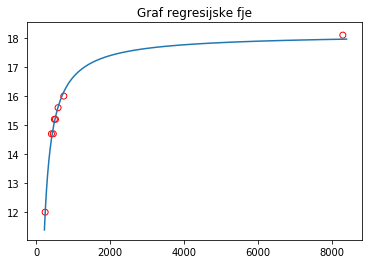

In [23]:
xniz=np.linspace(start=220,stop=8400,num=8181)
yniz=Theta[0]+Theta[1]/xniz
plt.plot(xniz,yniz)
plt.title('Graf regresijske fje')
plt.scatter(x,y,facecolors='none',edgecolors='r')
plt.show()

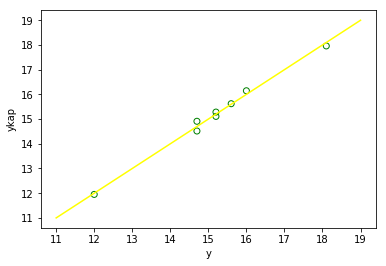

In [24]:
ykap=transf(1/x)
plt.plot([11,19],[11,19],color='yellow')
plt.scatter(y,ykap,facecolors='none',edgecolors='g')
plt.xlabel('y')
plt.ylabel('ykap')
plt.show()


Vidljivo je da su točke (y,ykap) aproksimativno na pravcu y=x, tj. grupiraju se oko pravca što potvrđuje da je model dobar za originalne podatke.